# Flight Fare Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('../../Data/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Checking and removing null values

In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Converting Date Time

In [5]:
df['Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
df['dep_hour'] = pd.to_datetime(df.Dep_Time, format='%H:%M').dt.hour
df['dep_min'] = pd.to_datetime(df.Dep_Time, format='%H:%M').dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [6]:
df['ariv_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['arriv_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.head()

/tmp/ipykernel_2660/2447102809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ariv_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
/tmp/ipykernel_2660/2447102809.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arriv_min'] = pd.to_datetime(df.Arrival_Time).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,ariv_hour,arriv_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21,35


In [7]:
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], inplace=True)

In [8]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,ariv_hour,arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35


In [20]:
def duration_to_minutes(duration):
    pattern = r'(\d+)\s*h\s*(\d*)\s*m*'
    match = re.match(pattern, duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        total_minutes = hours * 60 + minutes
        return total_minutes
    else:
        return 0
df['Duration_minutes'] = df['Duration'].apply(duration_to_minutes)

In [9]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,ariv_hour,arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35


In [10]:
df.drop(columns='Duration', inplace=True)

## Converting categorical Data to Bool and Numerical

In [12]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [13]:
Airline = pd.get_dummies(df['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [14]:
Source = pd.get_dummies(df['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [15]:
Destination = pd.get_dummies(df['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [16]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [17]:
df.replace({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops':3, '4 stops': 4})

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,ariv_hour,arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,14,10


In [18]:
df = pd.concat([df, Airline, Source, Destination], axis=1)

In [19]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,ariv_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,...,False,False,False,False,False,False,False,False,False,True


In [25]:
df.drop(columns=['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'],axis=1, inplace=True)

## Final data after cleaning

In [27]:
df.head()

,Total_Stops,Price,Day,Month,ariv_hour,arriv_min,Air India,GoAir,IndiGo,Jet Airways,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,13,15,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,4,25,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,23,30,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,21,35,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
df.shape

(10682, 26)

In [29]:
X = df.drop(columns='Price', axis=1)
y= df['Price']

In [30]:
X.head()

,Total_Stops,Day,Month,ariv_hour,arriv_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,1,10,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,13,15,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,4,25,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,23,30,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,21,35,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [31]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Cheking relation of price with other independent variables

In [32]:
df.corr()['Price']

Total_Stops                          0.603897
Price                                1.000000
Day                                 -0.153774
Month                               -0.103643
ariv_hour                            0.024244
arriv_min                           -0.086155
Air India                            0.050432
GoAir                               -0.095151
IndiGo                              -0.361070
Jet Airways                          0.416124
Jet Airways Business                 0.253303
Multiple carriers                    0.139793
Multiple carriers Premium economy    0.017650
SpiceJet                            -0.296565
Trujet                              -0.010381
Vistara                             -0.060654
Vistara Premium economy             -0.000454
Chennai                             -0.179223
Delhi                                0.270676
Kolkata                              0.009358
Mumbai                              -0.230755
Cochin                            

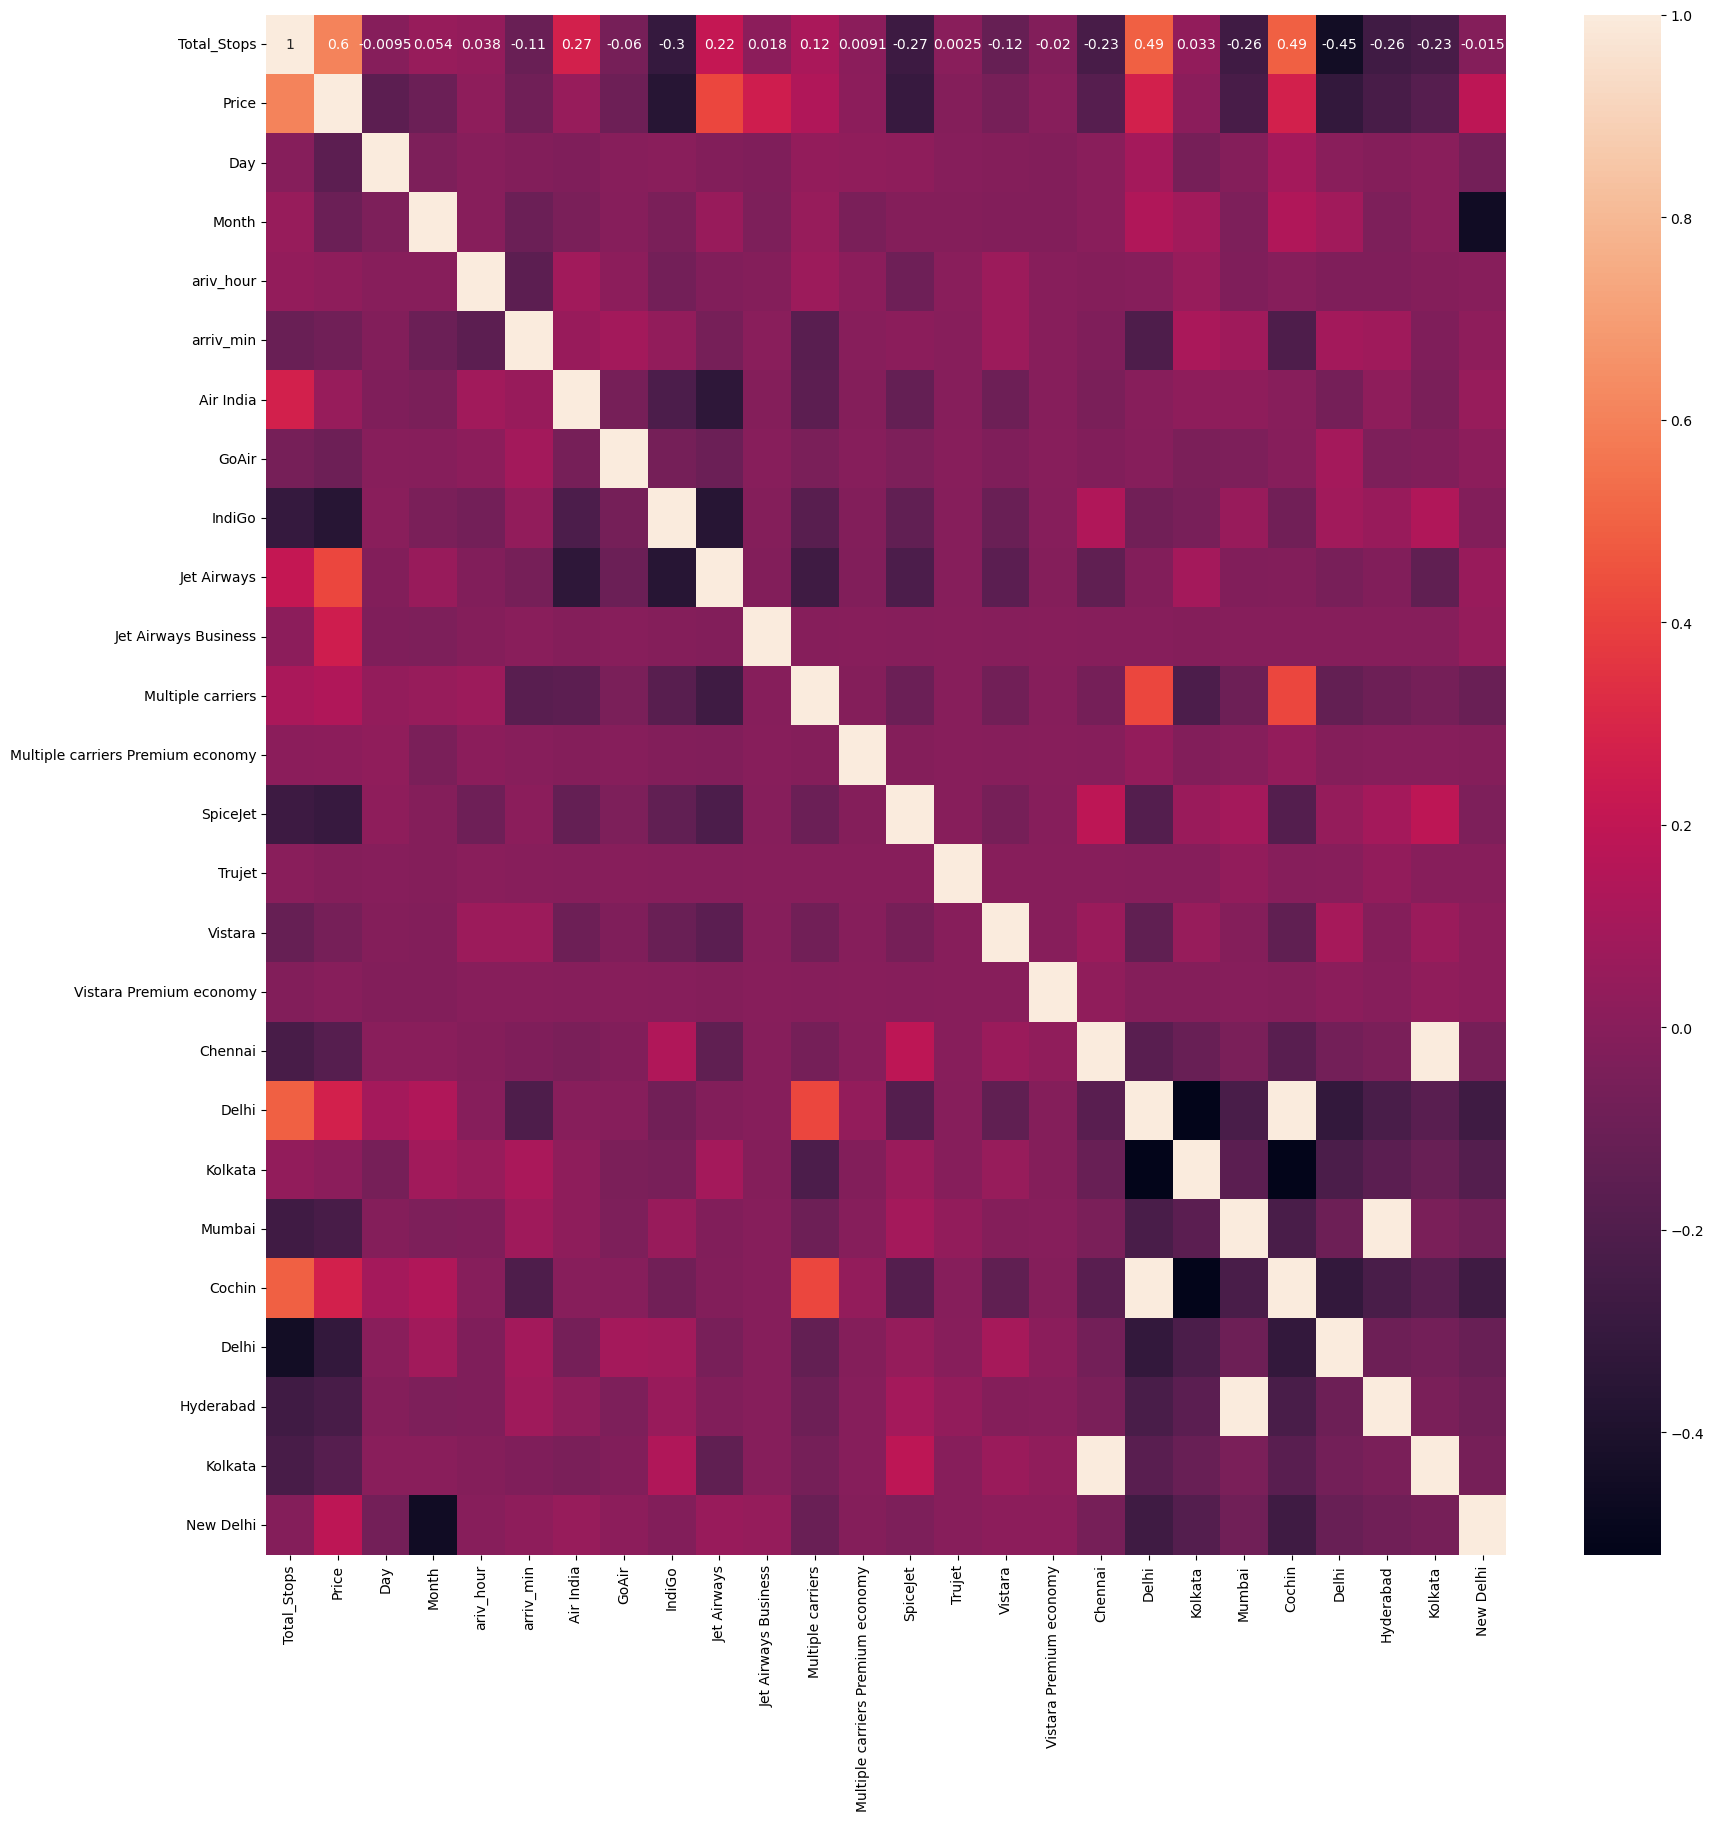

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
X_train, x_text, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_hat = model.predict(x_text)

In [38]:
y_hat

array([13204.97091088,  7608.97491671,  9511.25203686, ...,
        6919.16068758, 11460.73248889, 11517.38320875])

## Calculating Errors

In [47]:
mean_absolute_error(y_test, y_pred=y_hat)

1973.6260963009447

In [48]:
mean_squared_error(y_test, y_pred=y_hat)

8216617.234179608

In [49]:
r2_score(y_test, y_pred=y_hat)

0.6189316496232172

/home/chiran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

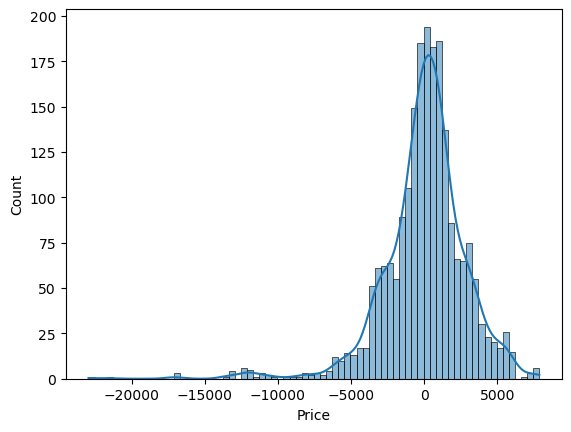

In [53]:
sns.histplot(y_hat-y_test, kde=True)

## Using Ridge 

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60.70,80,90]}
ridgeCV=GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60.7, 80, 90]},
             scoring='neg_mean_squared_error')

In [56]:
ridgeCV.best_params_

{'alpha': 1}

In [57]:
ridgeCV.best_score_

-8122161.844599733

In [59]:
ridge_prediction=ridgeCV.predict(x_text)

/home/chiran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


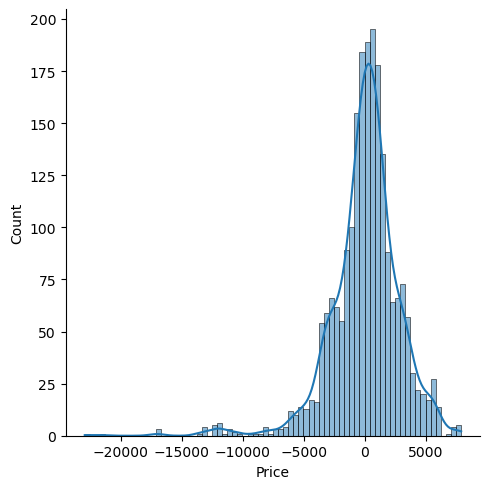

In [60]:
sns.displot(ridge_prediction-y_test, kde=True)

In [63]:
ridge_score=r2_score(ridge_prediction, y_test)
ridge_score

0.36889278240569123

# Using Lasso

In [64]:
from sklearn.linear_model import Lasso

In [65]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60.70,80,90]}
lassoCV=GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=5)
lassoCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60.7, 80, 90]},
             scoring='neg_mean_squared_error')

In [66]:
lassoCV.best_params_

{'alpha': 1}

In [67]:
lassoCV.best_score_

-8090301.680738553

In [68]:
lasso_prediction=lassoCV.predict(x_text)

/home/chiran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


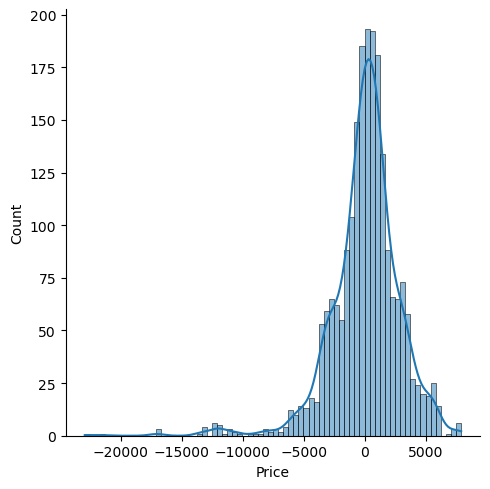

In [69]:
sns.displot(lasso_prediction-y_test, kde=True)